# Car contour segmentation with pure CV methods

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [24]:
from data_utils import train_ids, METADATA_CSV, TRAIN_MASKS_CSV, UNIQUE_CARS, UNIQUE_TRAIN_CARS
from image_utils import get_image_data

In [5]:
from image_utils import median_blur

Image shape: (1280, 1918, 3) | image type: uint8 | mask shape: (1280, 1918) | mask type: uint8


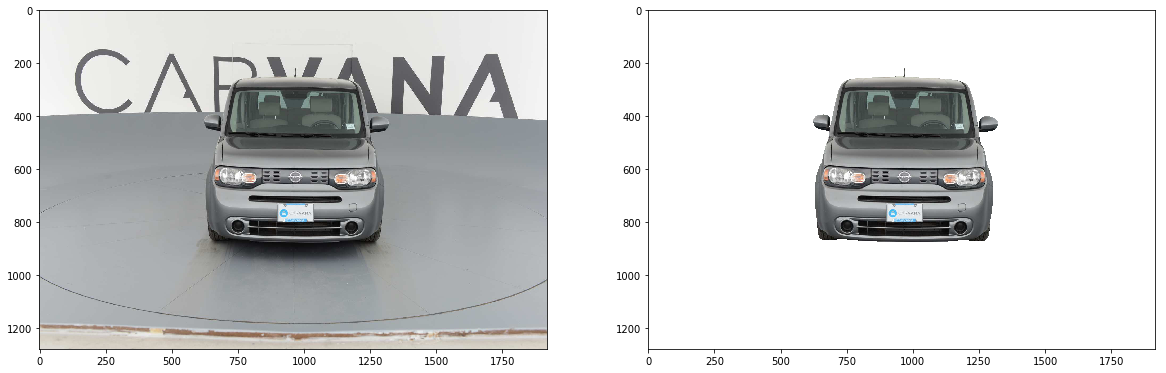

In [26]:
import cv2

image_id = UNIQUE_TRAIN_CARS[1] + '_01'

plt.figure(figsize=(20, 20))
img = get_image_data(image_id, "Train")
mask = get_image_data(image_id, "Train_mask")
unmask = (~mask / 255).astype(np.uint8)
white_bg = 255 * np.ones_like(img, dtype=np.uint8)
img_masked = cv2.bitwise_and(img, img, mask=mask) 
white_bg = cv2.bitwise_and(white_bg, white_bg, mask=unmask) 
img_masked = img_masked + white_bg

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(img.shape, img.dtype, mask.shape, mask.dtype) )

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_masked)

In [11]:
proc = median_blur(img, 7)

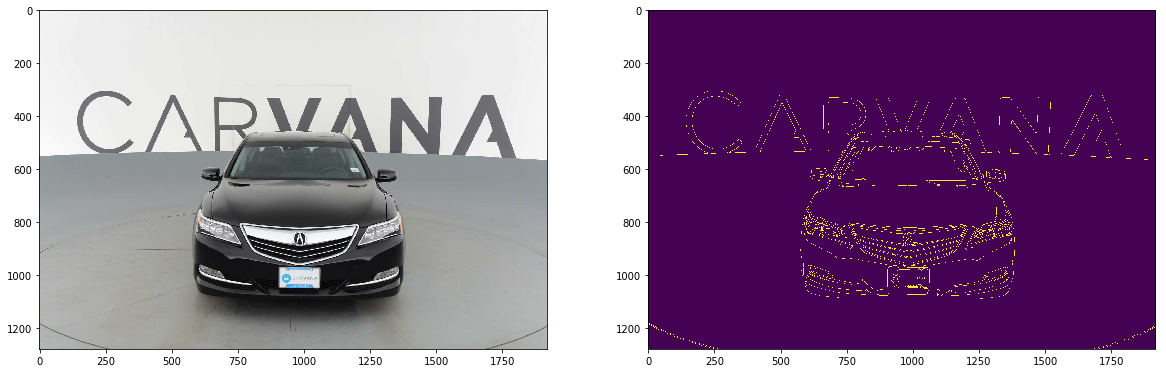

In [20]:
_proc = cv2.Canny(proc, 30, 110)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(_proc)

In [22]:
UNIQUE_CARS[0]

'0004d4463b50'